In [1]:
import torch
from torch import nn
import math
import torch.nn.functional as F


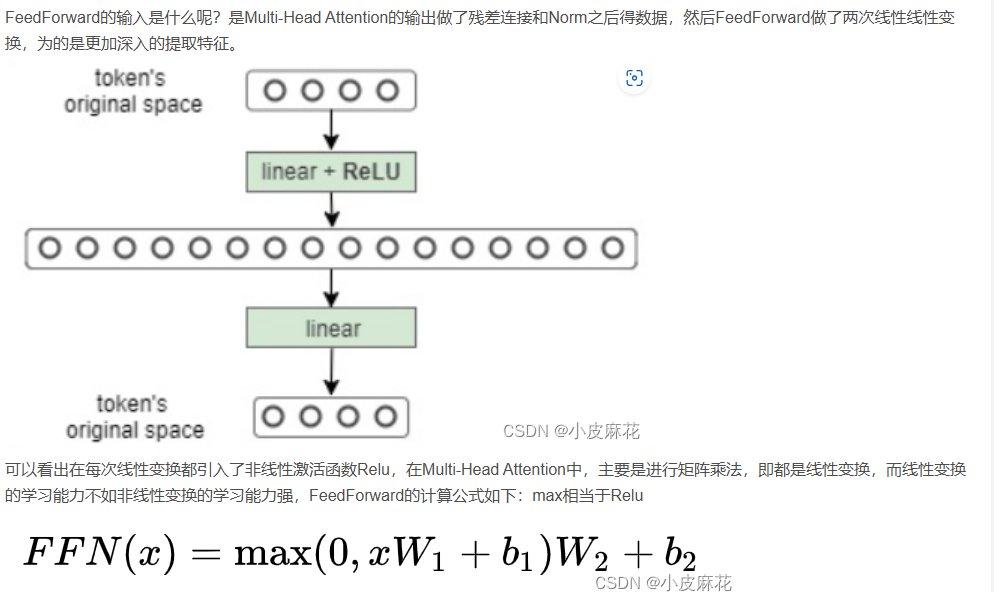

In [ ]:
class PositionWiseFeedForward(nn.Module):
    """
    w2(relu(w1(layer_norm(x)) + b1)) + b2
    """
    def __init__(self, d_model, d_ff, dropout = 0.1):
        super(PositionWiseFeedForward, self).__init__()
        self.w_1 = nn.Linear(d_model, d_ff)
        self.w_2 = nn.Linear(d_ff, d_model)
        self.layer_norm = nn.LayerNorm(d_model, eps=1e-6)
        self.dropout_1 = nn.Dropout(p = dropout)
        self.relu = nn.ReLU()
        self.dropout_2 = nn.Dropout(p = dropout)
    def forward(self, x):
        inter = self.dropout_1(self.relu(self.w_1(self.layer_norm(x))))
        output = self.dropout_2(self.w_2(inter))
        return output